## Домашнее задание к уроку № 8 "Обучение без учителя"

##### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.  
Загрузите "Boston House Prices dataset" из встроенных наборов   
данных библиотеки sklearn.  
Создайте датафреймы X и y из этих данных.  
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)  
с помощью функции train_test_split так, чтобы размер тестовой выборки  
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.  
Масштабируйте данные с помощью StandardScaler.  
Постройте модель TSNE на тренировочный данных с параметрами:  
n_components=2, learning_rate=250, random_state=42.  
Постройте диаграмму рассеяния на этих данных.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
boston = load_boston()

In [3]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [4]:
y = pd.DataFrame(boston.target, columns=['Price'])
y

,Price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()

In [7]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [8]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [9]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

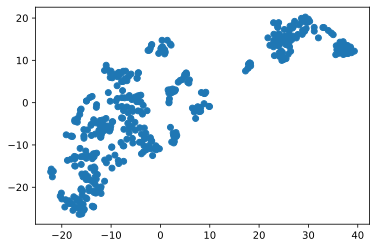

In [10]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

##### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,  
используйте все признаки из датафрейма X_train.  
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.  
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,  
и раскрасьте точки из разных кластеров разными цветами.  
Вычислите средние значения price и CRIM в разных кластерах.

In [11]:
from sklearn.cluster import KMeans

In [12]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [13]:
labels_train = kmeans.fit_predict(X_train_scaled)

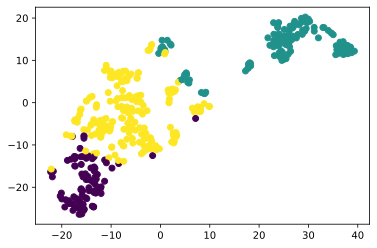

In [14]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

##### Кластер 0:

In [15]:
y_train.loc[labels_train == 0, 'Price'].mean()

27.78837209302326

In [16]:
X_train.loc[labels_train == 0, 'CRIM'].mean()

0.07356558139534884

##### Кластер 1:

In [17]:
y_train.loc[labels_train == 1, 'Price'].mean()

16.165354330708663

In [18]:
X_train.loc[labels_train == 1, 'CRIM'].mean()

10.797028425196851

##### Кластер 2:

In [19]:
y_train.loc[labels_train == 2, 'Price'].mean()

24.958115183246072

In [20]:
X_train.loc[labels_train == 2, 'CRIM'].mean()

0.4216602094240837

##### *Задание 3
Примените модель KMeans, построенную в предыдущем задании,  
к данным из тестового набора.  
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [21]:
labels_test = kmeans.predict(X_test_scaled)

##### Кластер 0:

In [22]:
y_test.loc[labels_test == 0, 'Price'].mean()

31.35

In [23]:
X_test.loc[labels_test == 0, 'CRIM'].mean()

0.06206

##### Кластер 1:

In [24]:
y_test.loc[labels_test == 1, 'Price'].mean()

16.43714285714286

In [25]:
X_test.loc[labels_test == 1, 'CRIM'].mean()

10.165531142857143

##### Кластер 2:

In [26]:
y_test.loc[labels_test == 2, 'Price'].mean()

21.860784313725492

In [27]:
X_test.loc[labels_test == 2, 'CRIM'].mean()

0.2660788235294118